<a href="https://colab.research.google.com/github/Seongjin1225/BigData/blob/main/%EC%9D%98%EB%A3%8C%EC%A2%85%EC%82%AC%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글폰트깨짐 방지(실행 후 런타임 다시 시작 필요!)
# plt.rcParams['font.family'] = 'NanumGothic'
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and direc

In [ ]:
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import folium

In [ ]:
df_people = pd.read_csv('/content/drive/MyDrive/BigData/보건복지부_병원 종사 의료인력 수_시도별_20221231.csv',encoding='cp949')
df_people

,연도,시도,의사,치과의사,한의사,조산사,간호사,간호조무사,의료기사,보건의료정보관리사,약사
0,2015,서울 Seoul,17261,1246,522,127.0,34353,4970,10643,664,1464
1,2015,부산 Busan,4734,174,355,176.0,12868,7041,4567,339,402
2,2015,대구 Daegu,3245,221,112,36.0,8082,2499,3103,176,270
3,2015,인천 Incheon,2484,85,96,20.0,6728,2170,2361,127,165
4,2015,광주 Gwangju,2186,236,333,18.0,6062,3058,2197,138,178
...,...,...,...,...,...,...,...,...,...,...,...
131,2022,전북 Jeonbuk,1535,745,574,0.0,605,4767,3250,48,2
132,2022,전남 Jeonnam,1151,640,408,0.0,541,3862,2703,15,3
133,2022,경북 Gyeongbuk,1577,825,714,1.0,891,5202,3183,23,5
134,2022,경남 Gyongnam,2123,1156,879,2.0,939,6454,4649,23,3


In [ ]:
df_peo = df_people[['연도','시도','의사','치과의사','간호사','간호조무사']]
df_peo

,연도,시도,의사,치과의사,간호사,간호조무사
0,2015,서울 Seoul,17261,1246,34353,4970
1,2015,부산 Busan,4734,174,12868,7041
2,2015,대구 Daegu,3245,221,8082,2499
3,2015,인천 Incheon,2484,85,6728,2170
4,2015,광주 Gwangju,2186,236,6062,3058
...,...,...,...,...,...,...
131,2022,전북 Jeonbuk,1535,745,605,4767
132,2022,전남 Jeonnam,1151,640,541,3862
133,2022,경북 Gyeongbuk,1577,825,891,5202
134,2022,경남 Gyongnam,2123,1156,939,6454


In [ ]:
df_peo['시도'] = df_peo['시도'].str.split().str[0]
df_peo

year_people = df_peo.groupby('연도').sum()
year_people

city_people = df_peo.groupby(['시도','연도']).sum()
city_people

<ipython-input-6-1f0946bb99bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peo['시도'] = df_peo['시도'].str.split().str[0]


의사  치과의사   간호사  간호조무사
시도 연도                           
강원 2015  1505   145  3864   1186
   2016  1531   145  4181   1316
   2017  1568   143  4349   1340
   2018  1590   143  4571   1383
   2019  1628   149  5075   1517
...       ...   ...   ...    ...
충북 2018  1273    58  3697   2162
   2019  1289    61  4072   2305
   2020  1293    65  4159   2309
   2021  1243    67  4406   2408
   2022  1192   598   422   4260

[136 rows x 4 columns]

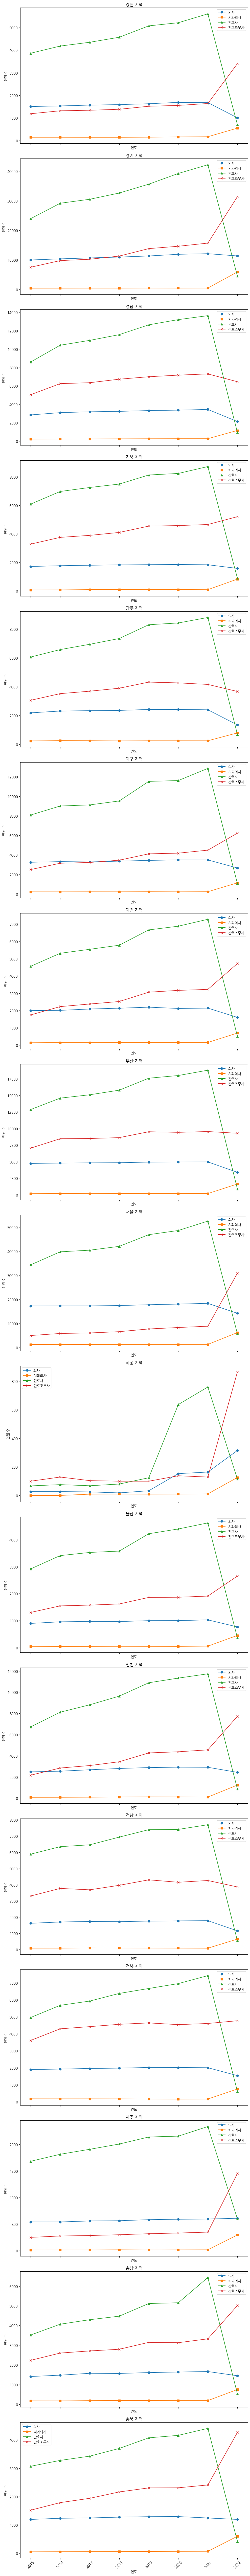

In [ ]:
# city people 시각화
# 제목은 각 시도 지역 이름
# x 축은 연도 축은 수?
# 총 17개 시도(광역시 + 남북도)
# fig = plt.figure(10,9)

grouped = city_people.groupby(level=0)

# 서브플롯 설정
num_regions = len(grouped)
fig, axes = plt.subplots(num_regions, 1, figsize=(10, 6 * num_regions), sharex=True)

# 각 지역별 데이터로 그래프 그리기
for (region, group), ax in zip(grouped, axes if num_regions > 1 else [axes]):
    plt.rcParams['font.family'] = 'NanumGothic'
    years = group.index.get_level_values('연도')  # 연도 값 가져오기
    ax.plot(years, group['의사'], label='의사', marker='o')
    ax.plot(years, group['치과의사'], label='치과의사', marker='s')
    ax.plot(years, group['간호사'], label='간호사', marker='^')
    ax.plot(years, group['간호조무사'], label='간호조무사', marker='x')

    # 제목과 라벨 추가
    plt.rcParams['font.family'] = 'NanumGothic'
    ax.set_title(f'{region} 지역')
    ax.set_xlabel('연도')
    ax.set_ylabel('인원 수')
    ax.legend()

    # x축에 각 연도 나타내기
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45)

# 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()